### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

### Dealing with null values

In [6]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
median = df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'].replace(np.nan, median, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Droping useless columns

In [9]:
df = df.drop(df.iloc[:,[0, 1]], axis = 1)

In [10]:
cat_id = [0, 1, 3, 4] + list(range(6, 20))
df.iloc[:, cat_id] = df.iloc[:, cat_id].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

In [12]:
df.describe(include='all')

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904,103904,103904.000000,103904,103904,103904.000000,103904.0,103904.0,103904.0,103904.0,...,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.000000,103904.000000,103904
unique,2,2,NaN,2,3,NaN,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,5.0,6.0,6.0,6.0,NaN,NaN,2
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,3.0,4.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,neutral or dissatisfied
freq,52727,84923,NaN,71655,49665,NaN,25868.0,25546.0,24449.0,28577.0,...,29423.0,30867.0,28789.0,37383.0,29055.0,37945.0,27179.0,NaN,NaN,58879
mean,NaN,NaN,39.379706,NaN,NaN,1189.448375,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.815618,15.133392,NaN
std,NaN,NaN,15.114964,NaN,NaN,997.147281,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.230901,38.649776,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,843.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1743.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,13.000000,NaN


In [13]:
df.to_csv('Airline_Passengers_df.csv')

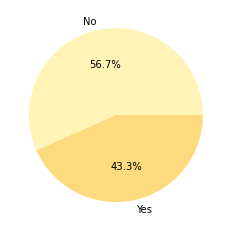

In [14]:
plt.pie(df['satisfaction'].value_counts(), labels=['No', 'Yes'], colors = sns.color_palette('YlOrBr'), autopct='%1.1f%%')
plt.show()

### Correlation matrix between numerical features

In [15]:
corr_mat = df.corr()

<AxesSubplot:>

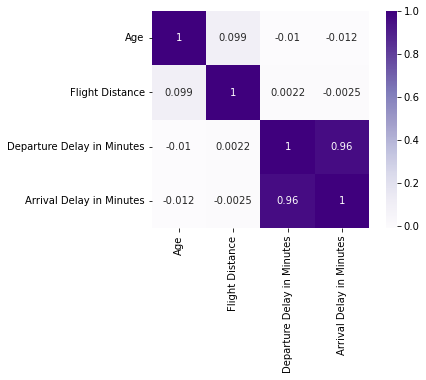

In [16]:
sns.heatmap(corr_mat, square = True, annot=True, cmap = 'Purples')

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

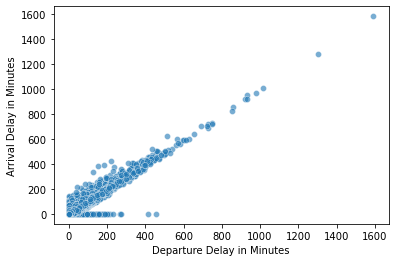

In [17]:
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data=df, alpha=0.6)

### Behavior of other features

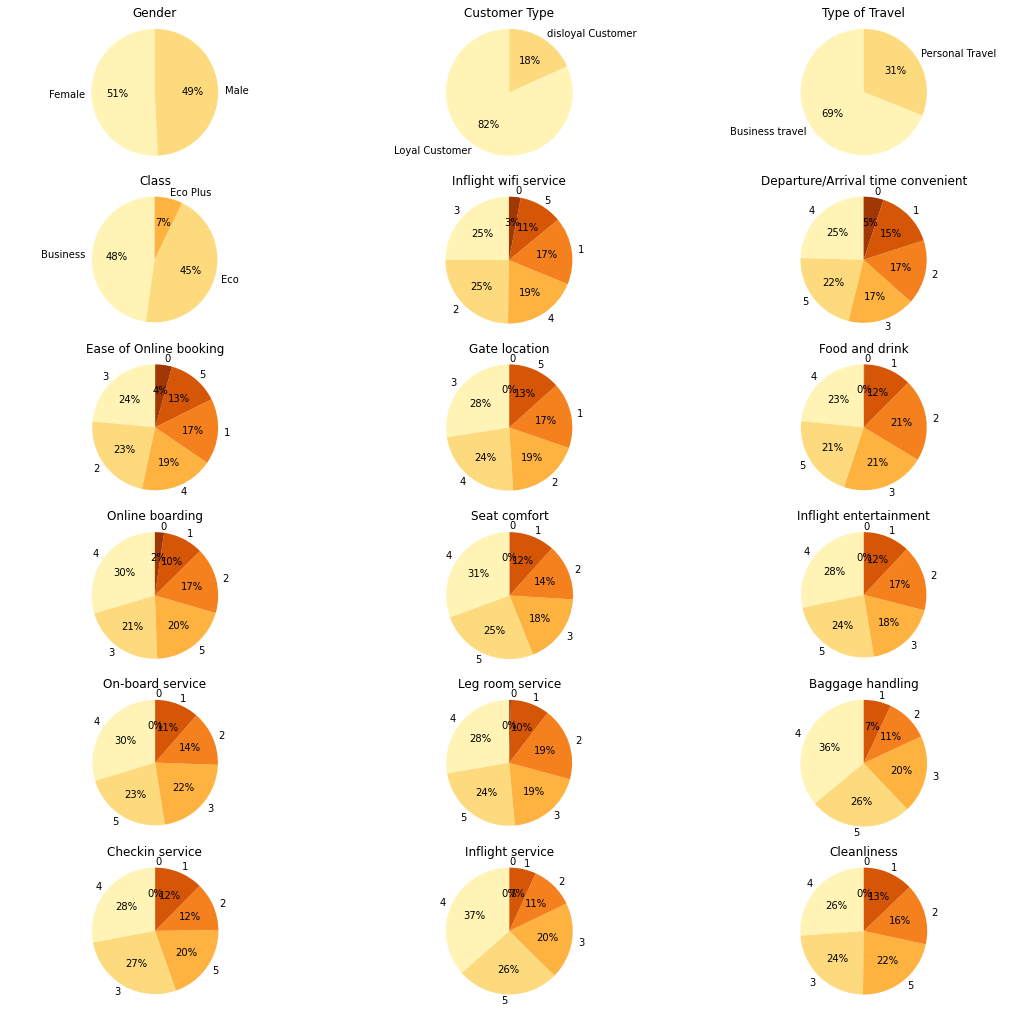

In [18]:
cat = df.iloc[:, cat_id]
fig, axes = plt.subplots(6, 3, figsize=(18, 18))
for i, cols in enumerate(cat):
    values = df[cols].value_counts()
    labels = values.index
    sizes = values.values
    axes[i//3, i%3].pie(sizes, labels=labels, colors=sns.color_palette('YlOrBr'), autopct= '%1.0f%%', startangle=90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(cols)
plt.show()

### Some Boxes and Histograms plots

<AxesSubplot:xlabel='Age', ylabel='Count'>

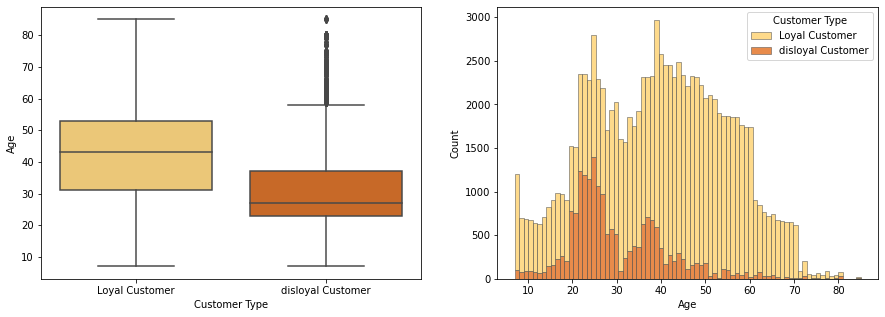

In [19]:
f, ax = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x='Customer Type', y='Age', palette='YlOrBr', data=df, ax = ax[0])
sns.histplot(df, x='Age', hue='Customer Type', multiple='stack', palette='YlOrBr', edgecolor='.3', linewidth=.5, ax=ax[1])

We can see that, the mostly loyal customers are around 35 and 55 years old and for the other hand, the age range for disloyal customers is a slightly smaller(between 25 and 40 years old).

<AxesSubplot:xlabel='Age', ylabel='Count'>

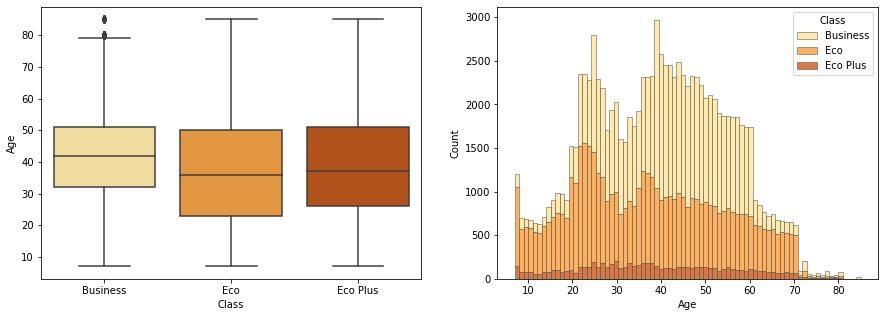

In [20]:
f, ax = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x='Class', y='Age', palette='YlOrBr', data=df, ax=ax[0])
sns.histplot(df, x='Age', hue='Class', multiple='stack', palette='YlOrBr', edgecolor='.3', linewidth=.5, ax=ax[1])

We can conclude that the average age is more or less the same in the three classes, and it can be assumed that regular customers mainly buy business class for themselves.

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

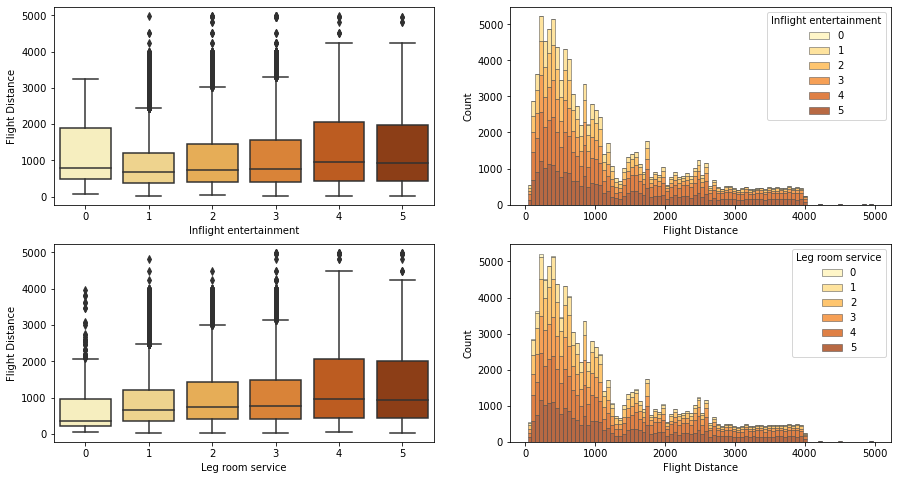

In [21]:
f, ax = plt.subplots(2,2, figsize=(15, 8))
sns.boxplot(x='Inflight entertainment', y='Flight Distance', palette='YlOrBr', data=df, ax=ax[0, 0])
sns.histplot(df, x='Flight Distance', hue='Inflight entertainment', multiple='stack', edgecolor='.3', palette='YlOrBr', linewidth=.5, ax=ax[0,1])
sns.boxplot(x='Leg room service', y='Flight Distance', palette='YlOrBr', data=df, ax=ax[1, 0])
sns.histplot(df, x='Flight Distance', hue='Leg room service', multiple='stack', palette='YlOrBr', edgecolor='.3', linewidth=.5, ax=ax[1,1])

From this graphics, it can be seen that the longer flight distance, the more people are satisfied with something like inflight entertainment and leg room service.

### Some count plots with the target of satisfaction of air passengers

<AxesSubplot:xlabel='Class', ylabel='count'>

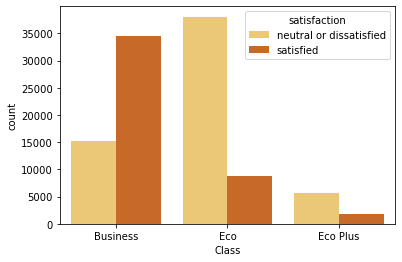

In [22]:
sns.countplot(x='Class', hue='satisfaction', palette='YlOrBr', data = df)

From this plot, it can be analyzed that the business class is the best based on the satisfaction of the people.

<AxesSubplot:xlabel='Inflight wifi service', ylabel='count'>

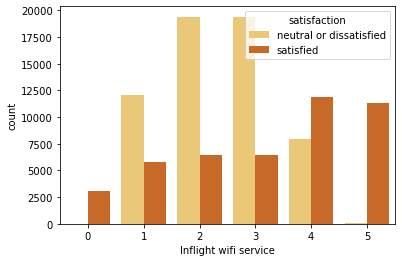

In [23]:
sns.countplot(x='Inflight wifi service', hue='satisfaction', palette='YlOrBr', data=df)

If you pay attention, you can see that is clearly a really determining factor that the inflight wifi service is pretty good.

<AxesSubplot:xlabel='Leg room service', ylabel='count'>

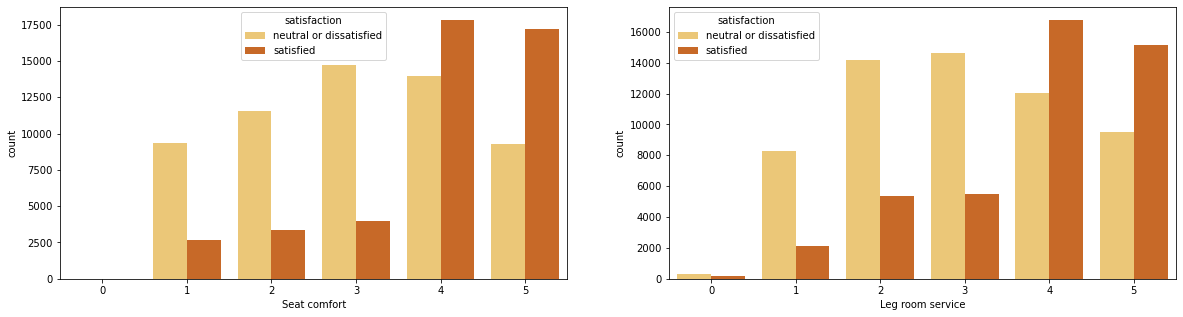

In [24]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x='Seat comfort', hue = 'satisfaction', palette='YlOrBr', data = df, ax=ax[0])
sns.countplot(x='Leg room service', hue = 'satisfaction', palette='YlOrBr', data= df, ax=ax[1])

And finally, when seat comfort and leg room service are rated 4 and 5 points more people is satisfied than not.

### Addressing categorical features

In [25]:
numerical_columns = [c for c in df.columns if df[c].dtype.name != 'category']

In [26]:
numerical_columns.remove('satisfaction')

In [27]:
categorical_column = [c for c in df.columns if df[c].dtype.name == 'category']

In [28]:
df_describe = df.describe(include=['category'])

In [29]:
binary = [c for c in categorical_column if df_describe[c]['unique'] == 2]
non_binary = [c for c in categorical_column if df_describe[c]['unique'] > 2]
print(f'Binary: {binary}\nNon_binary: {non_binary}')

Binary: ['Gender', 'Customer Type', 'Type of Travel']
Non_binary: ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [30]:
for col in binary:
    print(col, ': ', end = '')
    for uniq in df[col].unique():
        if uniq == df[col].unique()[-1]:
            print(uniq, end = '.')
        else:
            print(uniq, end = ', ')
    print()

Gender : Male, Female.
Customer Type : Loyal Customer, disloyal Customer.
Type of Travel : Personal Travel, Business travel.


In [31]:
df[col] == uniq

0         False
1          True
2          True
3          True
4          True
          ...  
103899     True
103900     True
103901     True
103902     True
103903     True
Name: Type of Travel, Length: 103904, dtype: bool

In [32]:
for co in binary:
    df[co] = df[co].astype('object')
    k = 0
    for uniq in df[co].unique():
        df.loc[df[co] == uniq, co] = k
        k += 1
for cols in binary:
    print(df[cols].describe(), end='\n\n')

count     103904
unique         2
top            1
freq       52727
Name: Gender, dtype: int64

count     103904
unique         2
top            0
freq       84923
Name: Customer Type, dtype: int64

count     103904
unique         2
top            1
freq       71655
Name: Type of Travel, dtype: int64



In [33]:
df_non_binary = pd.get_dummies(df[non_binary])
print(len(df_non_binary.columns),'columns')
df_non_binary.columns

86 columns


Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online board

### Normalization of quantitive features 

In [34]:
df_numerical = (df[numerical_columns] - df[numerical_columns].mean(axis=0)) / df[numerical_columns].std(axis=0)

In [35]:
df_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05
mean,-2.062606e-16,1.667322e-16,4.673560e-16,1.740579e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01


### Finalizing details

In [36]:
mapping = {'satisfied':1, 'neutral or dissatisfied':0}
df['satisfaction'] = df['satisfaction'].map(mapping)
target = df['satisfaction']
data = pd.concat((df_numerical, df_non_binary, df[binary]), axis=1)

In [37]:
target.shape

(103904,)

In [38]:
target = target.astype('category')

In [39]:
data.shape

(103904, 93)

In [40]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,-2.062606e-16,1.667322e-16,4.673560e-16,1.740579e-16,0.477989,0.449886,0.072124,0.029864,0.171697,0.248595,...,0.110265,0.195363,0.365193,0.260972,0.000115,0.128176,0.155259,0.236507,0.261578,0.218365
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499518,0.497485,0.258695,0.170213,0.377119,0.432200,...,0.313222,0.396482,0.481487,0.439167,0.010746,0.334287,0.362153,0.424939,0.439496,0.413138
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
data.dtypes

Age                           float64
Flight Distance               float64
Departure Delay in Minutes    float64
Arrival Delay in Minutes      float64
Class_Business                  uint8
                               ...   
Cleanliness_4                   uint8
Cleanliness_5                   uint8
Gender                         object
Customer Type                  object
Type of Travel                 object
Length: 93, dtype: object

In [42]:
data[['Gender', 'Customer Type', 'Type of Travel']] = data[['Gender', 'Customer Type', 'Type of Travel']].astype('category')

In [43]:
data.dtypes

Age                            float64
Flight Distance                float64
Departure Delay in Minutes     float64
Arrival Delay in Minutes       float64
Class_Business                   uint8
                                ...   
Cleanliness_4                    uint8
Cleanliness_5                    uint8
Gender                        category
Customer Type                 category
Type of Travel                category
Length: 93, dtype: object

### Neural Network V1

In [44]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.framework.ops import EagerTensor
from tensorflow.python.ops.resource_variable_ops import ResourceVariable
import time

In [45]:
X = data
y = target

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 34)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(93513, 93)
(10391, 93)
(93513,)
(10391,)


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

params = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

clf = GridSearchCV(MLPClassifier(random_state=42), params, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

C:\Users\Felipe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10),
                                                (50, 50), (100, 100)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [54]:
print('Best parameters found: ', clf.best_params_)
print('Best score: ', clf.best_score_)

Best parameters found:  {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best score:  0.9506666666666668


In [48]:
from sklearn.neural_network import MLPClassifier

In [49]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.1, max_iter=1000)

mlp.fit(X_train, y_train)

score = mlp.score(X_test, y_test)

print("Exactitud en el conjunto de prueba:", score)

Exactitud en el conjunto de prueba: 0.9605427774035222


In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hacer predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calcular el recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


Accuracy: 0.9605427774035222
Precision: 0.9652746255106672
Recall: 0.9430155210643015
F1-score: 0.9540152534768955


In [50]:
y_test[:20]

34726    1
2510     0
20354    1
77479    0
27038    1
28667    0
93132    0
23609    1
18500    0
5535     1
18612    0
47624    0
15493    0
1670     0
56419    0
49667    0
63921    1
77558    0
33246    1
68408    0
Name: satisfaction, dtype: category
Categories (2, int64): [0, 1]

In [59]:
y_pred = mlp.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
cf = confusion_matrix(y_pred, y_test)

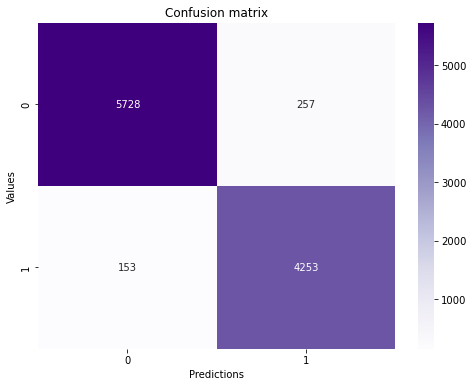

In [119]:
plt.figure(figsize=(8,6))
sns.heatmap(cf, annot=True, cmap='Purples', fmt='d', xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.xlabel('Predictions')
plt.ylabel('Values')
plt.title('Confusion matrix')
plt.show()

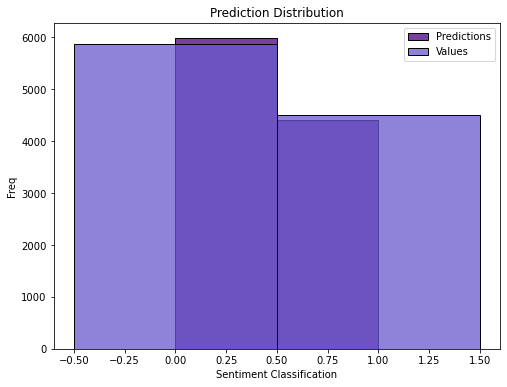

In [140]:
plt.figure(figsize=(8,6))
sns.histplot(y_pred, bins=len(mlp.classes_), color='#4B0082', label='Predictions')
sns.histplot(y_test, bins=len(mlp.classes_), color='#6A5ACD', label='Values')
plt.xlabel('Sentiment Classification')
plt.ylabel('Freq')
plt.title('Prediction Distribution')
plt.legend()
plt.show()

In [176]:
from sklearn.inspection import permutation_importance

result = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=42)

importance_scores = result.importances_mean
feature_names = X_train.columns

sorted_indices = importance_scores.argsort()[::-1]
sorted_feature_names = feature_names[sorted_indices]

top_k = 2  
for i in range(top_k):
    print(f"Feature {i+1}: {sorted_feature_names[i]}, Importance: {importance_scores[sorted_indices[i]]}")

Feature 1: Type of Travel, Importance: 0.14742565681840047
Feature 2: Customer Type, Importance: 0.05870464825329606


<Figure size 576x432 with 0 Axes>

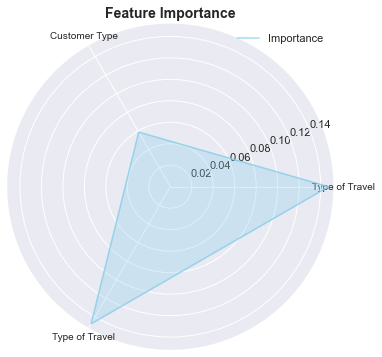

In [182]:
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-dark')

sorted_feature_names = feature_names[sorted_indices]
sorted_importance_scores = importance_scores[sorted_indices]

labels = np.concatenate((sorted_feature_names[:top_k], [sorted_feature_names[0]]))

scores = np.concatenate((sorted_importance_scores[:top_k], [sorted_importance_scores[0]]))

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()

scores = np.concatenate((scores, [scores[0]]))
angles += angles[:1]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, scores, color='skyblue', alpha=0.75)

ax.fill(angles, scores, color='skyblue', alpha=0.3)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)

ax.set_title('Feature Importance', size=14, fontweight='bold')
ax.legend(['Importance'], loc='upper right')

plt.show()